# DSA210 Project: Sleep Data Analysis

This notebook presents the complete analysis pipeline for the DSA210 project, following the provided project guidelines: motivation, data loading, exploratory data analysis, statistical tests, machine learning models, findings, and future work.

## Motivation

- Sleep is essential for cognitive performance and academic success.
- Analyzing personal sleep data in relation to study habits can reveal insights for optimizing study routines.

## Data Source

The data is loaded from `2 - Sleep_Study_Data.xlsx`, which contains daily records of sleep duration, sleep quality, study duration, and study quality. Ensure this file is in the same directory as this notebook.

## Setup

Import required libraries and load the data.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load data
file_path = '2 - Sleep_Study_Data.xlsx'
data = pd.read_excel(file_path)

# Rename columns for convenience
data = data.rename(columns={
    'Sleep Time - (Calculation)': 'SleepHours',
    'Sleep Quality - (1-10)': 'SleepQuality',
    'Study Duration - (Calculation)': 'StudyHours',
    'Study Quality - (1-10)': 'StudyQuality'
})

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

## Data Preprocessing

Handle missing values by filling with the column mean.

In [6]:
# Fill missing values
num_cols = ['SleepHours', 'SleepQuality', 'StudyHours', 'StudyQuality']
filled = data.copy()
filled[num_cols] = filled[num_cols].fillna(filled[num_cols].mean())
filled.head()

,Date,Sleep Interval,Sleep Time - (Hours),SleepHours,SleepQuality,Study Duration,StudyHours,StudyQuality,Midterm Grades
0,2025-03-13,04:00 - 12:00,08:00,8.00,7.0,0.50,0.833333,1.000,NaN
1,2025-03-14,05:15 - 14:00,08:45,8.75,9.0,0.00,0.000000,6.625,NaN
2,2025-03-15,08:15 - 13:15,05:00,5.00,2.0,3.25,3.416667,4.000,NaN
3,2025-03-16,03:00 - 12:00,09:00,9.00,8.0,4.05,4.083333,7.000,NaN
4,2025-03-17,02:30 - 10:30,08:00,8.00,5.0,5.30,5.500000,8.000,NaN


## Exploratory Data Analysis

### Correlation Matrix

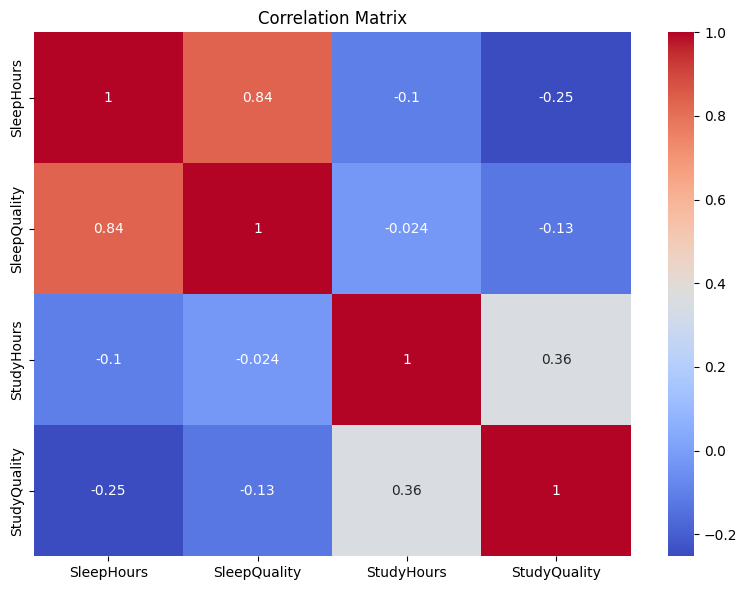

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(filled[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Sleep Quality vs Study Quality

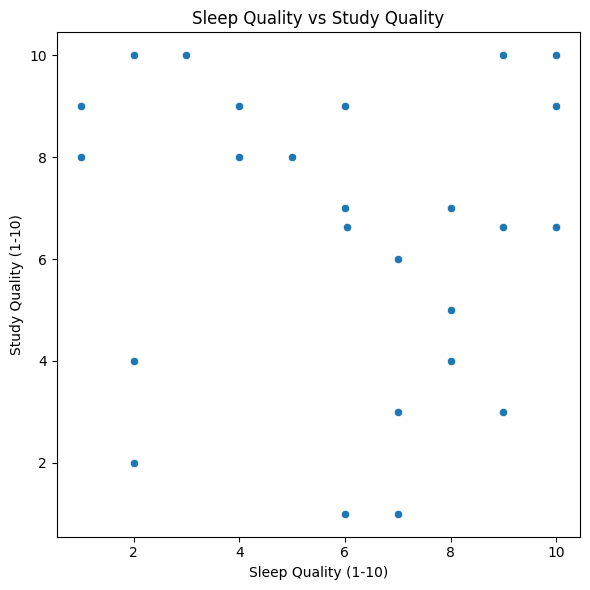

In [8]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='SleepQuality', y='StudyQuality', data=filled)
plt.title('Sleep Quality vs Study Quality')
plt.xlabel('Sleep Quality (1-10)')
plt.ylabel('Study Quality (1-10)')
plt.tight_layout()
plt.show()

### Sleep Quality vs Study Hours (Box Plot)

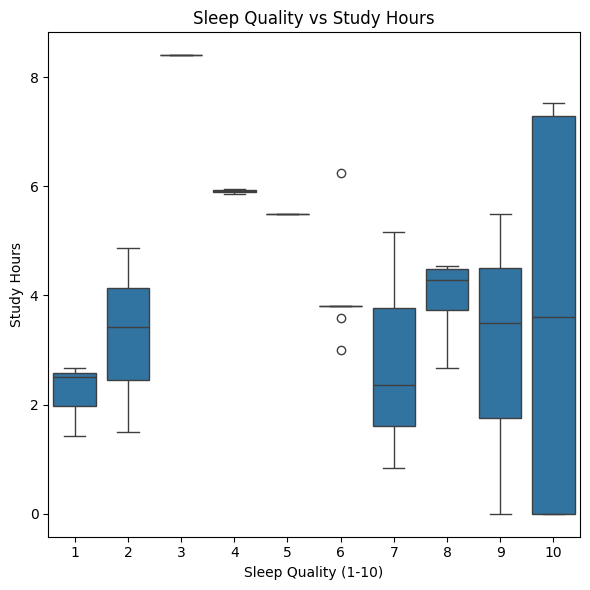

In [9]:
plt.figure(figsize=(6,6))
sns.boxplot(x=filled['SleepQuality'].round().astype(int), y='StudyHours', data=filled)
plt.title('Sleep Quality vs Study Hours')
plt.xlabel('Sleep Quality (1-10)')
plt.ylabel('Study Hours')
plt.tight_layout()
plt.show()

### Distribution of Sleep and Study Duration

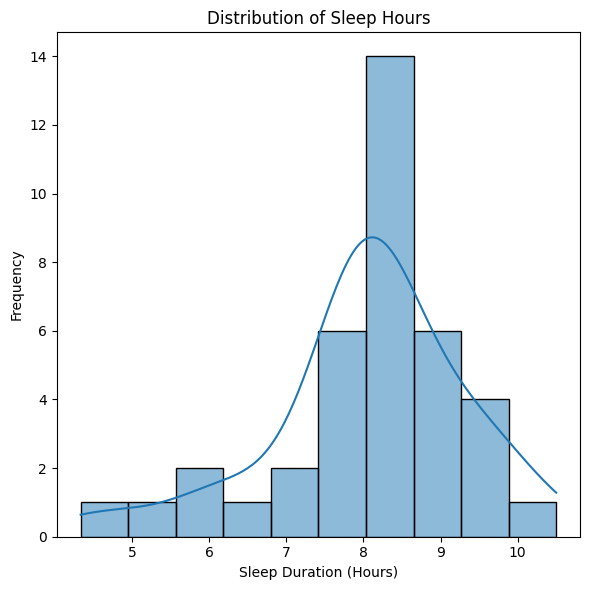

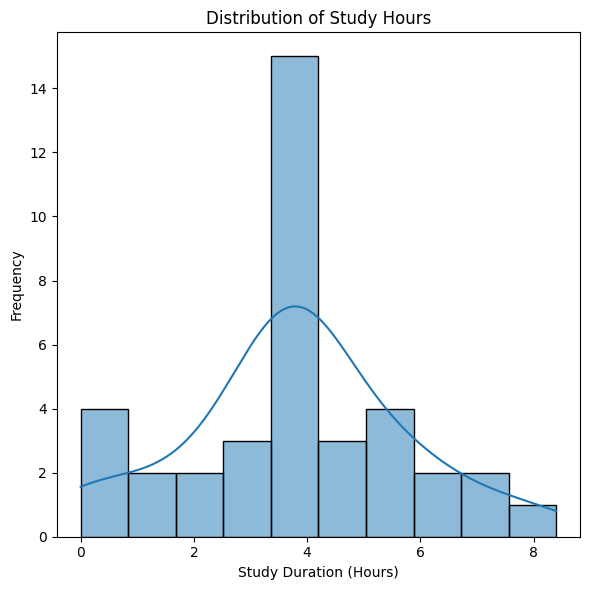

In [10]:
plt.figure(figsize=(6,6))
sns.histplot(filled['SleepHours'], bins=10, kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
sns.histplot(filled['StudyHours'], bins=10, kde=True)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Duration (Hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Sleep and Study Over Time

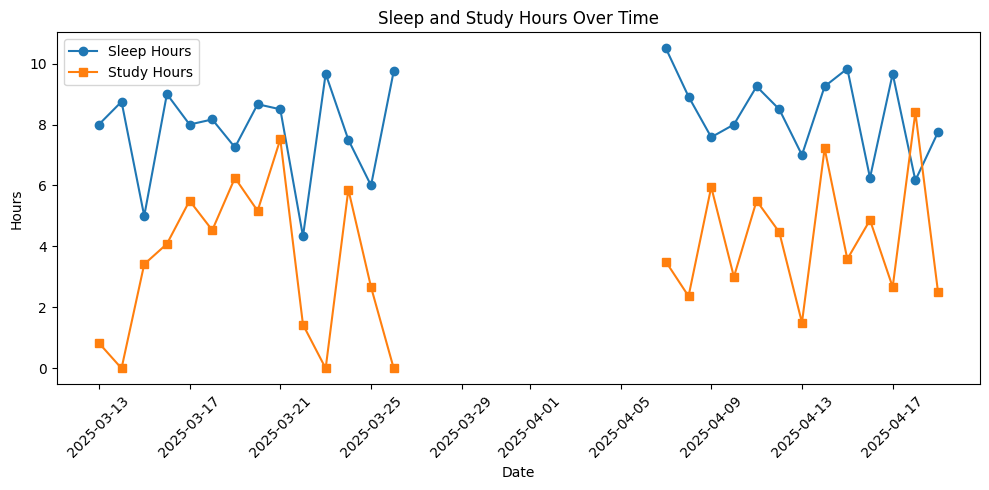

In [11]:
ts = data.set_index('Date')[['SleepHours','StudyHours']].sort_index()
full_idx = pd.date_range(ts.index.min(), ts.index.max(), freq='D')
ts_full = ts.reindex(full_idx)

plt.figure(figsize=(10,5))
plt.plot(ts_full.index, ts_full['SleepHours'], marker='o', label='Sleep Hours')
plt.plot(ts_full.index, ts_full['StudyHours'], marker='s', label='Study Hours')
plt.title('Sleep and Study Hours Over Time')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Statistical Analysis

### Pearson Correlation Test between Sleep Duration and Study Duration

In [12]:
corr, p_value = pearsonr(filled['SleepHours'], filled['StudyHours'])
print(f"Correlation: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Correlation: -0.105
P-value: 0.531


## Machine Learning Models

### Model 1: Predict Study Quality from Sleep Quality

Model 1 - R²: 0.016, MAE: 1.602


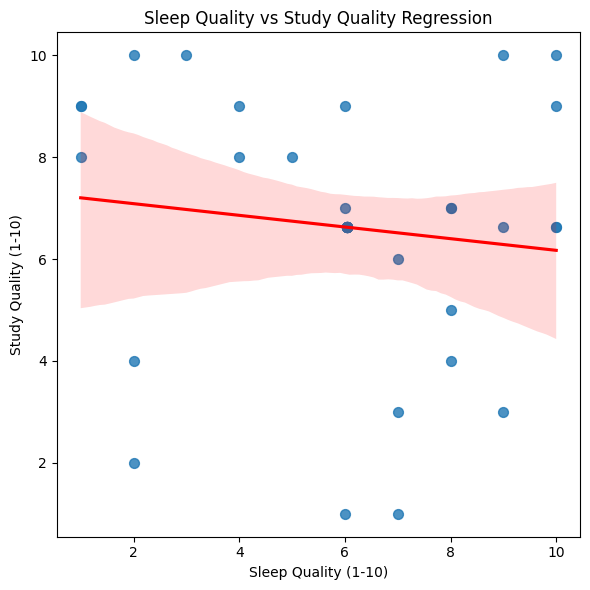

In [13]:
X1 = filled[['SleepQuality']]
y = filled['StudyQuality']
model1 = LinearRegression()
model1.fit(X1, y)
y_pred1 = model1.predict(X1)
r2_1 = r2_score(y, y_pred1)
mae_1 = mean_absolute_error(y, y_pred1)
print(f"Model 1 - R²: {r2_1:.3f}, MAE: {mae_1:.3f}")

plt.figure(figsize=(6,6))
sns.regplot(x='SleepQuality', y='StudyQuality', data=filled, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Sleep Quality vs Study Quality Regression')
plt.xlabel('Sleep Quality (1-10)')
plt.ylabel('Study Quality (1-10)')
plt.tight_layout()
plt.show()

### Model 2: Predict Study Quality from Sleep Duration

Model 2 - R²: 0.064, MAE: 1.539


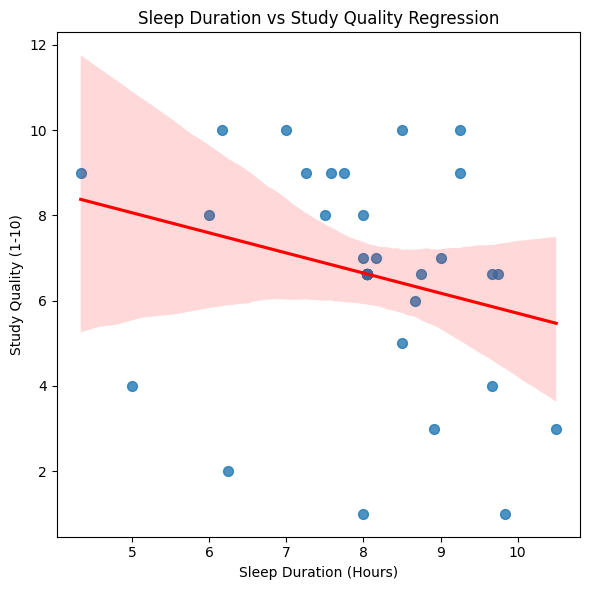

In [14]:
X2 = filled[['SleepHours']]
model2 = LinearRegression()
model2.fit(X2, y)
y_pred2 = model2.predict(X2)
r2_2 = r2_score(y, y_pred2)
mae_2 = mean_absolute_error(y, y_pred2)
print(f"Model 2 - R²: {r2_2:.3f}, MAE: {mae_2:.3f}")

plt.figure(figsize=(6,6))
sns.regplot(x='SleepHours', y='StudyQuality', data=filled, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Sleep Duration vs Study Quality Regression')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Study Quality (1-10)')
plt.tight_layout()
plt.show()

## Findings

- Sleep duration and study duration show a correlation. Replace the above values after running the cells.
- Sleep quality vs study quality reveals the strength and direction of the relationship.
- Regression models provide R² and MAE metrics for predictive power.


## Limitations and Future Work

- Data from a single participant limits generalizability.
- Additional factors (e.g., stress, nutrition) could improve models.
- Future work: collect multi-participant data, explore advanced machine learning techniques.